# Load Data

In [2]:
file =open('Royal_data.txt', 'r')
royal_data=file.readlines()
print(royal_data)
file.close()


['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [3]:
for i in range(len(royal_data)):
  royal_data[i]=royal_data[i].lower().replace('\n', '')
print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


# Remove stop words and tokenize

In [4]:
stopword=['the', 'is', 'will', 'now', 'can', 'be', 'a', 'only', 'their', 'and', 'at', 'it']

filtered_data=[]
for i in royal_data:
  temp=[]
  for word in i.split():
    if word not in stopword:
      temp.append(word)
  filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


# Creating Bigrams

In [5]:
bigrams=[]
for word_list in filtered_data:
  for i in range(len(word_list)-1):
    for j in range(i+1, len(word_list)):
      bigrams.append([word_list[i], word_list[j]])
      bigrams.append([word_list[j], word_list[i]])

print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


# Vocabulary

In [8]:
vocabulary=[]
for bi in bigrams:
  vocabulary.extend(bi)
vocabulary=list(set(vocabulary))
vocabulary.sort()
print(vocabulary)
print("Total number of unique words are: \n", len(vocabulary))

word_order={}
counter=0
for word in vocabulary:
  word_order[word]=counter
  counter+=1

print(word_order)


['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
Total number of unique words are: 
 12
{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


# One-hot encoding

In [9]:
import numpy as np
onehot_data=np.zeros((len(vocabulary), len(vocabulary)))
for i in range(len(vocabulary)):
  onehot_data[i][i]=1
one_dict={}
counter=0
for word in vocabulary:
  one_dict[word]=onehot_data[counter]
  counter+=1

for word in one_dict:
  print(word, ":", one_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
X=[]
Y=[]
for bi in bigrams:
  X.append(one_dict[bi[0]])
  Y.append(one_dict[bi[1]])

X=np.array(X)
Y=np.array(Y)
print(Y)
print(X)


[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.

# Model

!['image'](nn-2.png)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
hidden_layer_size=2
model=Sequential([
    Dense(hidden_layer_size, activation='linear'),
    Dense(Y.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')


In [14]:
model.fit(X,Y, epochs=1000, batch_size=256,verbose=False)

In [15]:
weight=model.get_weights()[0]
word_embeddings={}
for word in vocabulary:
  word_embeddings[word]=weight[word_order[word]]

print(word_embeddings)

{'beautiful': array([-1.1334883,  0.7315507], dtype=float32), 'boy': array([ 1.1240507, -1.1157411], dtype=float32), 'daughter': array([-1.5523199,  1.6056994], dtype=float32), 'future': array([1.3523109 , 0.15071943], dtype=float32), 'king': array([ 0.80844975, -0.667393  ], dtype=float32), 'man': array([0.5916757, 1.026372 ], dtype=float32), 'prince': array([1.6420839, 1.3126001], dtype=float32), 'princess': array([-1.5681583, -1.2494402], dtype=float32), 'queen': array([-1.0726417 ,  0.47503254], dtype=float32), 'son': array([ 0.69719166, -1.2914861 ], dtype=float32), 'strong': array([ 1.1241932, -0.607762 ], dtype=float32), 'woman': array([-0.68881553,  0.3599643 ], dtype=float32)}


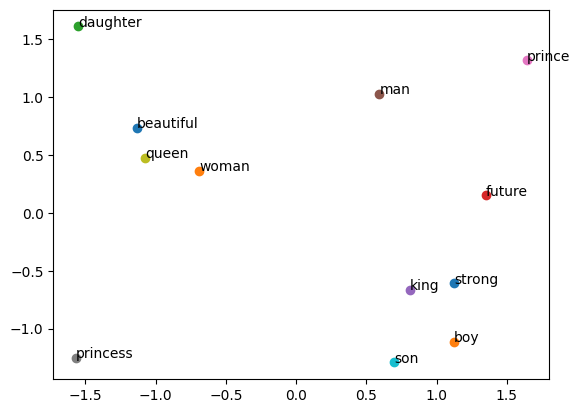

In [17]:
import matplotlib.pyplot as plt
for word in list(word_order.keys()):
  coord=word_embeddings.get(word)
  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))
plt.show()